# COMPLEXITY 

Linear regression
Calling n the number of observations and p the number of weights, the overall complexity should be n^2p+p^3.


random selection 
max 100 operation 


regression (peudoinverse matrix multiplication operation)

n_regressor * n 

# Data Import / Preprocessing

In [139]:
import pandas as pd

In [140]:
df = pd.read_pickle('data_india.pkl')
df_loc = pd.read_pickle('data_india_location.pkl')

In [141]:
df_loc = df_loc.drop_duplicates(subset=['Latitude','Longitude'])

In [142]:
df = df.T.loc[df_loc.index]
df = df.T.dropna()

In [143]:
df = df.T

In [145]:
DATA = df.values

In [180]:
from sklearn.covariance import empirical_covariance

array([[7.0906729 , 7.78274232, 7.3903193 , ..., 7.52351488, 7.05664984,
        6.95568829],
       [7.78274232, 8.74944302, 8.24131855, ..., 8.39296165, 7.86978869,
        7.75224948],
       [7.3903193 , 8.24131855, 7.93275931, ..., 8.00278699, 7.51110515,
        7.39582025],
       ...,
       [7.52351488, 8.39296165, 8.00278699, ..., 8.25096069, 7.67251368,
        7.55267929],
       [7.05664984, 7.86978869, 7.51110515, ..., 7.67251368, 7.29932176,
        7.10350405],
       [6.95568829, 7.75224948, 7.39582025, ..., 7.55267929, 7.10350405,
        7.07868489]])

In [592]:
df

,1816-04-01,1816-05-01,1816-06-01,1816-07-01,1816-08-01,1816-09-01,1816-10-01,1816-11-01,1816-12-01,1817-01-01,...,2012-11-01,2012-12-01,2013-01-01,2013-02-01,2013-03-01,2013-04-01,2013-05-01,2013-06-01,2013-07-01,2013-08-01
City,,,,,,,,,,,,,,,,,,,,,
Abohar,26.641,32.535,33.254,31.105,30.429,27.903,22.144,17.236,12.092,11.604,...,20.085,14.650,12.664,16.055,21.868,28.265,34.354,35.018,33.771,31.749
Achalpur,29.992,33.366,30.283,25.152,24.565,24.662,22.810,20.707,18.010,18.490,...,22.524,21.036,19.405,22.741,26.992,31.185,35.341,29.164,26.192,25.916
Adilabad,31.297,34.422,31.229,26.024,25.488,25.648,23.946,21.885,19.707,20.767,...,23.915,22.872,22.492,25.306,29.050,32.706,36.856,30.330,27.324,26.980
Adoni,30.342,31.433,28.569,25.323,25.330,25.030,23.744,23.335,21.654,22.455,...,25.434,24.806,25.435,27.426,30.693,33.048,33.602,29.279,27.500,27.524
Agartala,26.449,28.121,27.665,26.207,26.918,25.785,23.720,20.814,17.306,17.216,...,23.444,18.789,17.009,21.961,26.410,28.242,27.854,29.664,28.926,28.381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Raigarh,30.104,33.129,30.689,26.069,25.713,25.383,23.606,20.574,17.963,18.940,...,22.624,20.644,20.166,23.226,28.027,31.341,34.786,30.760,28.045,27.735
Raurkela,28.871,31.299,29.621,26.083,25.972,25.137,23.318,20.170,17.400,18.324,...,22.435,19.932,19.324,22.774,27.803,30.586,32.528,29.784,28.173,27.896
Shillong,23.552,25.526,25.940,25.321,26.141,24.613,22.191,19.662,16.419,16.111,...,21.909,18.013,16.376,21.109,24.618,25.467,25.495,28.416,27.998,27.555


In [286]:
DATA.T.shape

(2025, 10001)

In [569]:
D = D[:,-100:]

In [570]:
D = DATA[:,-100:]
cov = empirical_covariance(D.T)

In [593]:
D = df.values[:,-50:-12]
cov = empirical_covariance(D.T)

In [601]:
a = np.array([1,2,3,4])

In [605]:
np.where(a==1)

(array([0]),)

In [688]:
def correlation_from_covariance(covariance):
    v = np.sqrt(np.diag(covariance))
    outer_v = np.outer(v, v)
    correlation = covariance / outer_v
    correlation[covariance == 0] = 0
    return correlation

In [689]:
correlation_from_covariance(cov)

array([[1.        , 0.86054558, 0.80917621, ..., 0.94833397, 0.96572033,
        0.86132672],
       [0.86054558, 1.        , 0.99181348, ..., 0.75419317, 0.71297913,
        0.97581538],
       [0.80917621, 0.99181348, 1.        , ..., 0.69119154, 0.64313742,
        0.97776014],
       ...,
       [0.94833397, 0.75419317, 0.69119154, ..., 1.        , 0.9545265 ,
        0.78476251],
       [0.96572033, 0.71297913, 0.64313742, ..., 0.9545265 , 1.        ,
        0.72382805],
       [0.86132672, 0.97581538, 0.97776014, ..., 0.78476251, 0.72382805,
        1.        ]])

In [701]:
# rd = random.choice(range(len(D)))
result=[]
cov = correlation_from_covariance(cov)
k=3
start=time.time()
lst = []
n=0
s=0
#     k=10
for i in range(len(D)) : 
    rd = i 
    idx = (-cov[rd]).argsort()[:k]
    idx[np.where(idx==rd)] = (-cov[rd]).argsort()[k]
    reg = LinearRegression().fit(
        D[idx].T, D[rd]
    )
    scr = reg.score(
        D[idx].T, D[rd]
    )
#     print(i,scr)
    s+=scr
print(s)

95.9410158627795


In [702]:
# rd = random.choice(range(len(D)))
result=[]
cov = empirical_covariance(D.T)
k=3
start=time.time()
lst = []
n=0
s=0
#     k=10
for i in range(len(D)) : 
    rd = i 
    idx = (-cov[rd]).argsort()[:k]
    idx[np.where(idx==rd)] = (-cov[rd]).argsort()[k]
    reg = LinearRegression().fit(
        D[idx].T, D[rd]
    )
    scr = reg.score(
        D[idx].T, D[rd]
    )
    s+=scr
print(s)

90.67623419617043


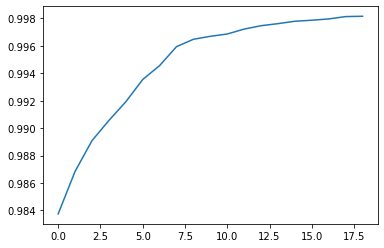

In [691]:
plt.plot(np.array(result)[:,0])

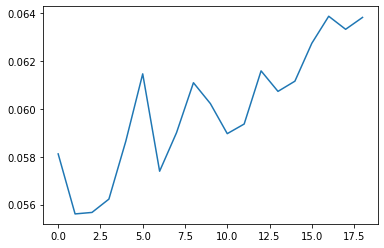

In [684]:
plt.plot(np.array(result)[:,1])

In [658]:
np.array(lst)[:,-1].sum()

<ipython-input-658-2778f8d1b235>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(lst)[:,-1].sum()


92.60725123277767

In [648]:
z = cov.sum(axis=0)
ord_ = z.argsort()
z[ord_]


array([  96.55400054,  112.1123856 ,  175.80674302,  237.60631531,
        387.29569816,  444.0278866 ,  505.31494593,  541.18027106,
        556.50707906,  567.57321168,  573.65029226,  720.17260399,
        778.16612559,  796.8415484 ,  883.0357391 ,  899.31985659,
        914.65833743,  930.05799262,  960.35633088,  964.4390612 ,
       1019.85998339, 1029.24808767, 1048.57878548, 1080.37381098,
       1096.02681424, 1172.56709036, 1184.27644523, 1204.66458628,
       1207.73015785, 1266.05149161, 1269.13718053, 1290.52935646,
       1301.68923872, 1305.92383355, 1351.98746044, 1356.88625254,
       1360.25671248, 1419.0508002 , 1419.63805452, 1439.3223622 ,
       1453.25133046, 1463.87223189, 1480.52620254, 1498.44745978,
       1551.12577021, 1551.76426843, 1562.64246806, 1564.21169405,
       1566.50115999, 1575.90865611, 1581.2858591 , 1639.18676758,
       1643.20689548, 1645.8902287 , 1663.45810968, 1663.73230125,
       1684.35743507, 1719.42414871, 1719.68780567, 1755.98998

In [654]:
cov[12]

array([-0.24813682,  2.1415249 ,  2.35833273,  2.0856026 ,  0.37010494,
        0.97161408,  1.32301576,  1.95142792,  0.42098819,  1.0872858 ,
        2.36531348,  0.48874458,  1.29839954,  0.51872718,  1.21057989,
        0.30111327,  0.22571098,  1.10793843, -0.33301418,  0.6148695 ,
        1.04969194,  1.36008898,  2.23714442,  0.69310551,  0.42704347,
        0.8903693 ,  0.26815133,  0.89447324,  0.34220973,  1.30884016,
        1.55423956,  0.08482888,  2.33504469,  0.84425759,  0.84185721,
        1.44091669,  1.83814123,  1.06532878,  1.50918163,  1.11311488,
        2.19140779,  1.54653626,  0.89719058,  1.59542517,  0.49836156,
        2.11933196,  1.53598443,  0.58191278,  1.90615681,  2.40465778,
        2.07722326,  0.24673125,  0.39978534, -0.51309855,  2.23672119,
        1.93037524,  1.51174419,  2.00558508, -0.08639318, -0.40656101,
        1.07940754,  1.83980368, -1.37997772, -0.88816314,  0.84981623,
        2.27703965,  1.42655851,  0.75303902,  2.06971845,  1.07

In [653]:
ord_[0]

12

In [652]:
lst[ord_[0]]

[12, array([49, 10,  2, 32, 73]), 0.9058029080658745]

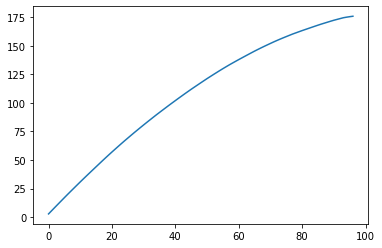

In [642]:
plt.plot(cov[91][(-cov[91]).argsort()].cumsum())

In [ ]:
(-cov[rd]).argsort()[:5]

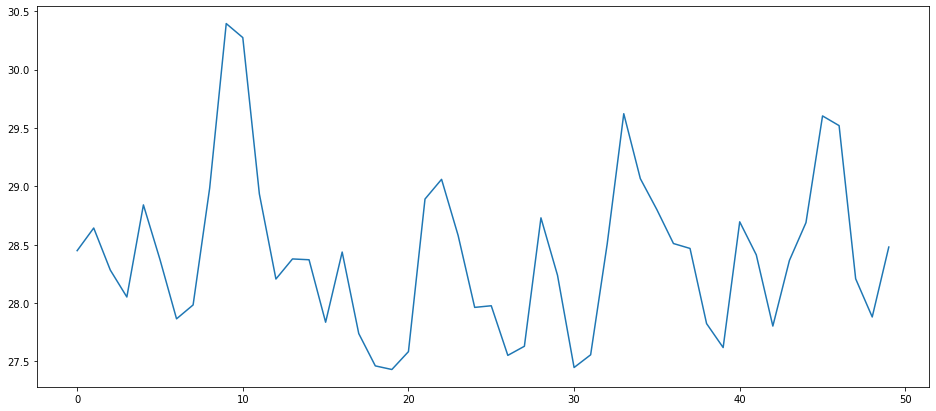

In [591]:
plt.figure(figsize=(16,7))
plt.plot(D[91])

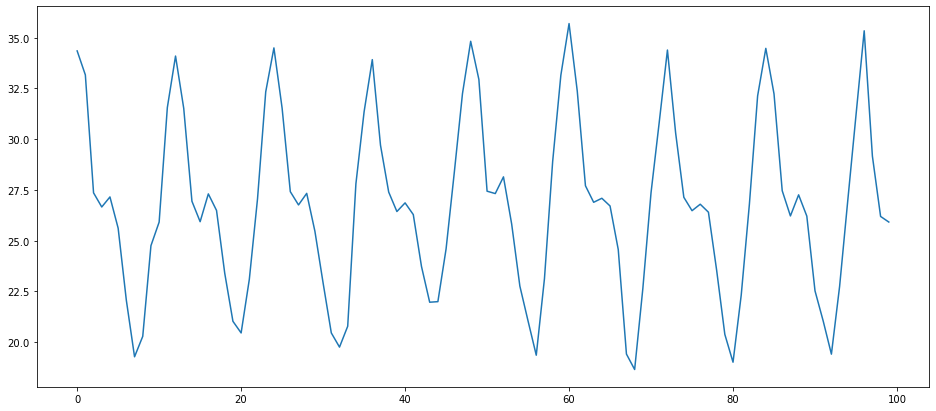

In [541]:
plt.figure(figsize=(16,7))
plt.plot(D[1])

In [506]:
df.iloc[91]

1816-04-01    27.198
1816-05-01    28.127
1816-06-01    26.915
1816-07-01    25.616
1816-08-01    26.261
               ...  
2013-04-01    29.603
2013-05-01    29.520
2013-06-01    28.208
2013-07-01    27.881
2013-08-01    28.480
Name: Port Blair, Length: 2025, dtype: float64

0.9723749881478515

In [267]:
cov_10000 = empirical_covariance(DATA.T)

In [275]:
np.matmul(DATA, DATA.T).shape

(10001, 10001)

In [281]:
(-cov_10000[4]).argsort()[:3]

array([ 0, 31, 51])

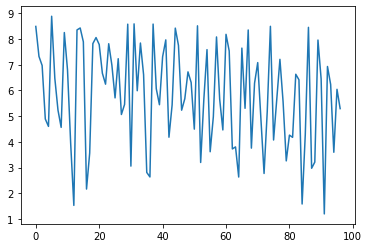

In [258]:
plt.plot(cov[rd])

In [199]:
cov[0].argmax(k=5)

TypeError: 'k' is an invalid keyword argument for argmax()

In [175]:
idx = random.choices(range(10000), k=3)
reg = LinearRegression().fit(
    DATA[idx[:2]].T, DATA[idx[-1]]
)
reg.score(DATA[idx[:2]].T, DATA[idx[-1]])

0.00015048400878725499

In [159]:
len(DATA)

97

In [160]:
while True : 
    DATA = np.vstack(
        (DATA, np.random.rand(2025))
    )
    if len(DATA) > 10000 : 
        break
        

In [161]:
DATA

array([[2.66410000e+01, 3.25350000e+01, 3.32540000e+01, ...,
        3.50180000e+01, 3.37710000e+01, 3.17490000e+01],
       [2.99920000e+01, 3.33660000e+01, 3.02830000e+01, ...,
        2.91640000e+01, 2.61920000e+01, 2.59160000e+01],
       [3.12970000e+01, 3.44220000e+01, 3.12290000e+01, ...,
        3.03300000e+01, 2.73240000e+01, 2.69800000e+01],
       ...,
       [1.60142807e-01, 2.53548769e-01, 8.91011203e-01, ...,
        2.32877403e-01, 9.94379184e-01, 2.04696172e-01],
       [2.18911216e-01, 9.04404770e-01, 9.79487133e-01, ...,
        6.43237454e-02, 2.81958231e-01, 9.89250090e-01],
       [8.64639938e-01, 8.14385788e-01, 9.44548683e-01, ...,
        3.78901377e-01, 1.44900011e-01, 1.30360321e-03]])

In [135]:
while True :     
    idx = random.choice(df.index)
    print(idx)
    df = df.append(df.loc[idx]  + np.random.randn(2025))
    if len(df) > 10000 :
        break

Jammu
Bhilai
Gadag
Aizawl
Bhilai
Murwara
Haldwani
Brahmapur
Gondal
Bhilai
Bhavnagar
Akola
Alandur
Gandhidham
Ambur
Bijapur
Amroha
Barsi
Bhusawal
Ara
Agra
Aligarh
Beawar
Palanpur
Bhusawal
Gulbarga
Brahmapur
Gulbarga
Gondal
Damoh
Port Blair
Brahmapur
Bhilai
Bijapur
Begusarai
Jammu
Gadag
Kochi
Balurghat
Agartala
Fatehpur
Haldwani
Haldwani
Srinagar
Haldwani
Bhimavaram
Adilabad
Haldwani
Kochi
Chitradurga
Haldwani
Bhusawal
Fatehpur
Brahmapur
Alandur
Hazaribag
Bhilai
Haldwani
Brahmapur
Bhilai
Shillong
Bhopal
Gulbarga
Haldwani
Bhilai
Haldwani
Haldwani
Haldwani
Haldwani
Haldwani
Haldwani


In [136]:
df

,1816-04-01,1816-05-01,1816-06-01,1816-07-01,1816-08-01,1816-09-01,1816-10-01,1816-11-01,1816-12-01,1817-01-01,...,2012-11-01,2012-12-01,2013-01-01,2013-02-01,2013-03-01,2013-04-01,2013-05-01,2013-06-01,2013-07-01,2013-08-01
City,,,,,,,,,,,,,,,,,,,,,
Abohar,26.641000,32.535000,33.254000,31.105000,30.429000,27.903000,22.144000,17.236000,12.092000,11.604000,...,20.085000,14.650000,12.664000,16.055000,21.868000,28.265000,34.354000,35.018000,33.771000,31.749000
Achalpur,29.992000,33.366000,30.283000,25.152000,24.565000,24.662000,22.810000,20.707000,18.010000,18.490000,...,22.524000,21.036000,19.405000,22.741000,26.992000,31.185000,35.341000,29.164000,26.192000,25.916000
Adilabad,31.297000,34.422000,31.229000,26.024000,25.488000,25.648000,23.946000,21.885000,19.707000,20.767000,...,23.915000,22.872000,22.492000,25.306000,29.050000,32.706000,36.856000,30.330000,27.324000,26.980000
Adoni,30.342000,31.433000,28.569000,25.323000,25.330000,25.030000,23.744000,23.335000,21.654000,22.455000,...,25.434000,24.806000,25.435000,27.426000,30.693000,33.048000,33.602000,29.279000,27.500000,27.524000
Agartala,26.449000,28.121000,27.665000,26.207000,26.918000,25.785000,23.720000,20.814000,17.306000,17.216000,...,23.444000,18.789000,17.009000,21.961000,26.410000,28.242000,27.854000,29.664000,28.926000,28.381000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Haldwani,19.577967,25.435526,25.248004,20.391620,27.509524,18.953353,22.584256,13.011676,8.998983,10.291479,...,12.318974,8.484892,4.883103,11.864966,13.179641,18.889205,22.437881,22.368282,23.115176,20.138610
Haldwani,16.456753,24.788338,26.610354,22.475305,24.809847,17.520606,20.605074,12.865732,6.640819,9.440853,...,13.204789,11.352846,8.481026,13.698494,13.181312,20.539032,23.160612,21.435376,21.018099,19.115257
Haldwani,16.692731,24.061039,27.184602,21.313212,27.572856,17.887592,22.098597,13.613824,8.001426,11.586395,...,13.065167,10.382619,5.245927,13.228433,12.960595,18.646843,24.227804,22.460379,22.850679,20.429957


98

In [115]:
np.random.randn(2025)

(2025,)

# Randomly select stations and training regressor 

In [7]:
import random
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [97]:
df = pd.read_pickle('DATA.pkl')

In [ ]:
df.index

In [98]:
df

dt,1891-01-01,1891-02-01,1891-03-01,1891-04-01,1891-06-01,1891-07-01,1891-09-01,1891-10-01,1891-11-01,1891-12-01,...,2012-11-01,2012-12-01,2013-01-01,2013-02-01,2013-03-01,2013-04-01,2013-05-01,2013-06-01,2013-07-01,2013-08-01
0,-1.524,-2.288,5.473,8.516,17.928,20.522,16.008,11.074,4.912,0.676,...,7.934,2.486,1.539,4.612,6.846,11.092,17.070,19.056,20.736,21.452
1,-20.212,-17.456,-9.954,-1.447,15.325,18.268,10.934,0.880,-9.087,-12.860,...,-6.514,-21.321,-12.440,-14.449,-2.304,5.718,10.061,15.592,17.727,16.859
2,5.883,9.365,9.047,11.203,15.989,17.513,16.855,13.173,10.456,9.535,...,10.908,10.247,9.773,9.020,10.558,11.893,12.805,16.596,20.877,20.348
3,-3.317,0.921,3.530,5.685,15.101,16.348,14.770,10.348,3.573,2.605,...,5.905,3.526,0.904,0.121,1.834,8.374,11.463,15.589,19.869,18.098
4,-2.873,1.399,0.803,4.693,14.896,17.251,13.401,9.972,2.900,2.219,...,5.927,-0.921,-0.344,-0.390,-0.474,5.514,12.770,15.223,18.259,17.423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,-8.691,-6.533,1.181,5.275,16.880,20.301,13.309,7.549,-1.648,-1.858,...,4.514,-5.440,-5.139,-0.834,-2.459,9.199,17.625,20.128,19.627,19.019
1338,21.415,24.027,25.772,25.199,27.314,27.003,26.553,27.212,25.547,24.569,...,28.175,25.302,24.305,25.754,26.294,26.372,27.757,28.564,27.898,26.547
1339,20.751,23.317,27.893,31.612,30.583,27.643,28.052,27.878,25.754,22.142,...,28.405,24.125,23.185,26.495,32.198,32.605,34.403,32.488,29.677,26.918
1340,0.036,-0.878,6.652,9.060,18.565,21.078,16.688,12.112,6.870,2.199,...,9.702,4.074,3.419,5.842,8.075,11.876,17.662,19.818,21.343,22.225


In [24]:
import time
start = time.time()
for i in range(10) : 
    print(i)
end = time.time()

print(end-start)


0
1
2
3
4
5
6
7
8
9
0.00042891502380371094


In [25]:
len(df)

1342

In [53]:
#PARAMETERS 

n_station = len(df); k = 2; n_regressor=5; thres = 0.8

def regressor_training_active(df, n_station, k, n_regressor, thres) : 
    
    COEF = np.zeros(
        (n_station*n_regressor,len(df)+1)
    )

    for i in range(n_station):
        y = df.iloc[i]   
        n=0  
        t=0
#         print(df.index[i])
        while True : 
            while True :
                rn = random.choices(range(len(df)),k=k)
                if i not in rn :
                    break                
            X = df.iloc[rn]
            reg = LinearRegression().fit(X.T, y)
            score = reg.score(X.T,y)
            if score > thres :

    #             print("\t", i*n_regressor + n, rn, np.array(df.index)[[rn]],reg.score(X.T,y), reg.coef_, reg.intercept_)
                COEF[i*n_regressor + n][rn] = reg.coef_
                COEF[i*n_regressor + n][-1] = reg.intercept_
                n+=1
            else : 
    #             print(score, "is less than the threadhold", thres)
                t+=1
            if n>=n_regressor : 
                break
            if t>=1000 : 
#                 print(df.index[i], "has problem of fitting into regressors")
                break
    return COEF

In [92]:
#PARAMETERS 

n_station = len(df); k = 2; n_regressor=50; thres = 0.9

def regressor_training_ensemble(df, n_station, k, n_regressor, thres) : 
    
    COEF = np.zeros(
        (n_station*n_regressor,len(df)+1)
    )
    WEIGHT = np.zeros(n_station*n_regressor)

    for i in range(n_station):
        y = df.iloc[i]   
        n=0  
        t=0
#         print(df.index[i])
        while True : 
            while True : #for selection of random variables 
                rn = random.choices(range(len(df)),k=k)
                if i not in rn :
                    break                
            X = df.iloc[rn]
            reg = LinearRegression().fit(X.T, y)
            score = reg.score(X.T,y)
            COEF[i*n_regressor + n][rn] = reg.coef_
            COEF[i*n_regressor + n][-1] = reg.intercept_
            WEIGHT[i*n_regressor + n] = score
            n+=1
            if n>=n_regressor : 
                idx = slice(i*n_regressor,i*n_regressor+n_regressor)
#                 WEIGHT[idx] = WEIGHT[idx] / sum(WEIGHT[idx])
                break
            
    return COEF, WEIGHT

In [90]:
start = time.time()
COEF, WEIGHT = regressor_training_ensemble(df.iloc[:,-100:], n_station, k, n_regressor, thres)
end = time.time()
print(end-start)

16.146061420440674


In [93]:
start = time.time()
COEF, WEIGHT = regressor_training_ensemble(df, n_station, k, n_regressor, thres)
end = time.time()
print(end-start)

17.11467671394348


(array([  5.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   1.,   1.,
          2.,   1.,   1.,   3.,   2.,   0.,   1.,   2.,   1.,   1.,   1.,
          0.,   5.,   3.,   1.,   0.,   2.,   1.,   2.,   3.,   5.,   4.,
          7.,   7.,   2.,   4.,   4.,   7.,   5.,   8.,   8.,   3.,   7.,
          5.,   5.,   3.,   5.,   7.,   7.,   5.,  11.,  10.,  11.,  10.,
         13.,  13.,  12.,   8.,  17.,  17.,  22.,  12.,   7.,  11.,  14.,
         13.,  15.,  16.,  17.,  25.,  16.,  21.,  29.,  22.,  37.,  24.,
         24.,  40.,  43.,  41.,  44.,  49.,  69.,  57.,  65.,  77., 101.,
         97., 138., 160., 183., 236., 309., 319., 359., 422., 422., 494.,
        527.]),
 array([0.00416574, 0.01411786, 0.02406998, 0.0340221 , 0.04397423,
        0.05392635, 0.06387847, 0.07383059, 0.08378271, 0.09373483,
        0.10368695, 0.11363907, 0.12359119, 0.13354331, 0.14349543,
        0.15344755, 0.16339967, 0.17335179, 0.18330391, 0.19325603,
        0.20320815, 0.21316027, 0.22311239, 0.

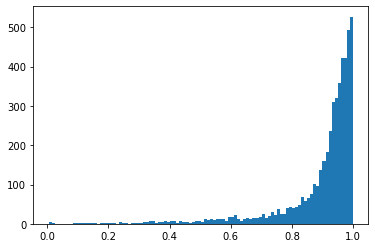

In [96]:
plt.hist(WEIGHT, bins=100)

In [74]:
WEIGHT[slice(i*n_regressor,i*n_regressor+n_regressor)]

array([0.99043766, 0.99414641, 0.99279923, 0.9561083 , 0.98573211])

In [70]:
WEIGHT[0:0+n_regressor]

array([0.20315916, 0.18704996, 0.2066416 , 0.19083719, 0.21231209])

In [55]:
COEF

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.81476007],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.2698424 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 17.52487575],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 14.68876708],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -2.53224725],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  3.96798033]])

In [384]:
i=10

np.matmul(
    COEF,
    df.iloc[:,i].append(pd.Series([1]))
).reshape(n_station, n_regressor).mean(axis=1) - df.iloc[:10,i]


City
Abohar       -0.400660
Achalpur     -0.175703
Adilabad     -0.394823
Adoni        -0.373636
Agartala      0.225878
Agra         -0.783651
Ahmadabad    -0.010600
Ahmadnagar   -0.228764
Aizawl        0.103872
Ajmer        -0.023217
Name: 1817-02-01 00:00:00, dtype: float64

In [347]:
df.iloc[:10,0]

City
Abohar        26.641
Achalpur      29.992
Adilabad      31.297
Adoni         30.342
Agartala      26.449
Agra          28.738
Ahmadabad     29.427
Ahmadnagar    27.695
Aizawl        24.400
Ajmer         28.595
Name: 1816-04-01 00:00:00, dtype: float64

In [325]:
df.loc['Abohar']

1816-04-01    26.641
1816-05-01    32.535
1816-06-01    33.254
1816-07-01    31.105
1816-08-01    30.429
               ...  
2013-04-01    28.265
2013-05-01    34.354
2013-06-01    35.018
2013-07-01    33.771
2013-08-01    31.749
Name: Abohar, Length: 2025, dtype: float64

In [327]:
df.loc['Bharuch'] * -0.13494314 + df.loc['Amritsar'] * 0.56975373 + df.loc['Bikaner'] * 0.57257126

1816-04-01    26.702792
1816-05-01    32.792622
1816-06-01    33.377710
1816-07-01    30.891762
1816-08-01    30.271370
                ...    
2013-04-01    28.476314
2013-05-01    34.690429
2013-06-01    35.378771
2013-07-01    33.591639
2013-08-01    31.561712
Length: 2025, dtype: float64

In [324]:
np.matmul(
    df.T.values,
    COEF[0]
)

array([49.54933474, 53.61445881, 51.89121456, ..., 54.87943036,
       52.13485002, 51.0880009 ])

(97,)

In [314]:
np.matmul(
    df.T,
A    COEF[0]
)

ValueError: Shape of passed values is (2025, 1), indices imply (2025, 97)

In [303]:
np.matmul(
    COEF,
    df.iloc[:,0]
)

array([49.54933474, 27.47391935, 37.96589508, 19.98159677, 62.1091263 ,
       26.70279258, 78.63107079, 32.09632   , 24.65089744, 28.07977923,
       27.64864698, 43.51771734, 32.27161147, 32.24301047, 27.06517448,
       31.00092493, 24.15599002, 33.28003402, 47.84713739, 35.41042816,
       25.47805923, 40.4138637 , 36.48080711, 35.97312142, 35.6911022 ,
       26.39820077, 24.13733723, 31.51207824, 29.7656164 , 29.97919233,
       28.13250686, 32.61560177, 26.08413981, 42.50350189, 28.09962988,
       32.56344108, 28.63116372, 32.01503599, 29.71346478, 37.01484272,
       20.88534866, 24.95643362, 31.76025706, 27.06119298, 28.88456963,
       24.54782433, 24.08138001, 29.41512692, 11.81872159, 18.91787201,
       47.24262312, 34.04428282, 30.44815707, 41.03951032, 36.6812326 ,
       29.26591605, 35.56316079, 28.4388363 , 43.85346586, 29.12758952,
       23.6745561 , 22.62087395, 25.08116344, 20.755081  , 22.8258629 ,
       31.82412503, 22.68599898, 19.66605555, 20.85364813, 23.51

In [237]:
np.matmul(
    COEF[6],
    df.iloc[:,0]
)

-2.432306379263782

In [231]:
df.iloc[0,0]

26.641

In [218]:
PRED = np.matmul(
    COEF,
    df.iloc[:,0]
)

In [220]:
PRED.shape

(200,)

In [227]:
Alandur

NameError: name 'Alandur' is not defined

In [226]:
PRED.reshape(20,10).mean(axis=1) - df.iloc[:20,0]

City
Abohar        -4.753990
Achalpur       6.282720
Adilabad      -2.312907
Adoni         -0.987025
Agartala      -5.125964
Agra           8.284352
Ahmadabad     -1.014706
Ahmadnagar     0.804779
Aizawl        -4.077917
Ajmer          4.961513
Akola          3.757692
Alandur      -10.008140
Alappuzha     -5.164323
Aligarh        0.553177
Allahabad      7.257717
Ambala         5.400147
Ambarnath     -4.260879
Ambur         -5.634788
Amritsar      -3.479171
Amroha         3.855089
Name: 1816-04-01 00:00:00, dtype: float64

In [174]:
cities

['Baharampur', 'Adoni', 'Ara']

In [87]:
np.array((df.index[0]))

array('Abohar', dtype='<U6')

In [90]:
np.delete(
    np.array(df.index),
    i
)

array(['Achalpur', 'Adilabad', 'Adoni', 'Agartala', 'Agra', 'Ahmadabad',
       'Ahmadnagar', 'Aizawl', 'Ajmer', 'Akola', 'Alandur', 'Alappuzha',
       'Aligarh', 'Allahabad', 'Ambala', 'Ambarnath', 'Ambur', 'Amritsar',
       'Amroha', 'Ara', 'Asansol', 'Aurangabad', 'Azamgarh', 'Bagaha',
       'Baharampur', 'Bahraich', 'Baleshwar', 'Balurghat', 'Banda',
       'Bangalore', 'Barnala', 'Barsi', 'Beawar', 'Begusarai', 'Belgaum',
       'Bhadravati', 'Bharatpur', 'Bharuch', 'Bhavnagar', 'Bhilai',
       'Bhilwara', 'Bhimavaram', 'Bhiwandi', 'Bhiwani', 'Bhopal',
       'Bhubaneswar', 'Bhuj', 'Bhusawal', 'Bidar', 'Bijapur', 'Bikaner',
       'Brahmapur', 'Chandigarh', 'Chhindwara', 'Chitradurga', 'Cuddapah',
       'Damoh', 'Darbhanga', 'Darjiling', 'Dehri', 'Dewas', 'Dibrugarh',
       'Dimapur', 'Dindigul', 'Durg', 'Eluru', 'Fatehpur', 'Gadag',
       'Gandhidham', 'Godhra', 'Gondal', 'Gudalur', 'Gulbarga', 'Guna',
       'Guwahati', 'Haldwani', 'Hazaribag', 'Hyderabad', 'Ichalkaranji'

0.9980720960409558

In [59]:
reg.coef_

array([-0.00879475,  1.00832045,  0.07803537])

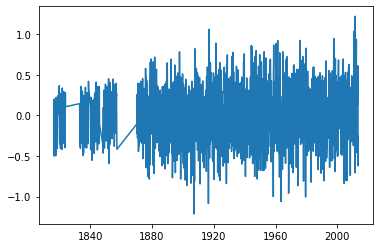

In [64]:
plt.plot(reg.predict(X.T)-y)